# Ejemplo 1: K-Means

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Carga el conjunto de datos Iris
iris = load_iris()
X = iris.data  # Características de las flores


In [23]:
# Configura el modelo K-Means con un rango de K (número de clusters) para probar
k_range = range(2, 11)
mean_silhouette_scores = []

# El silhouette_score es una métrica de evaluación comúnmente utilizada para
# medir la calidad de los clusters en un algoritmo de clustering, como K-Means.
# Esta métrica cuantifica cuán similares son los objetos dentro de un mismo
# cluster (cohesión) en comparación con los objetos en clusters vecinos
# (separación).
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    mean_silhouette_scores.append(silhouette_avg)

In [24]:
# Encuentra el valor óptimo de K basado en el coeficiente de silueta
optimal_k = k_range[np.argmax(mean_silhouette_scores)]


In [35]:
# Configura el modelo K-Means con el valor óptimo de K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

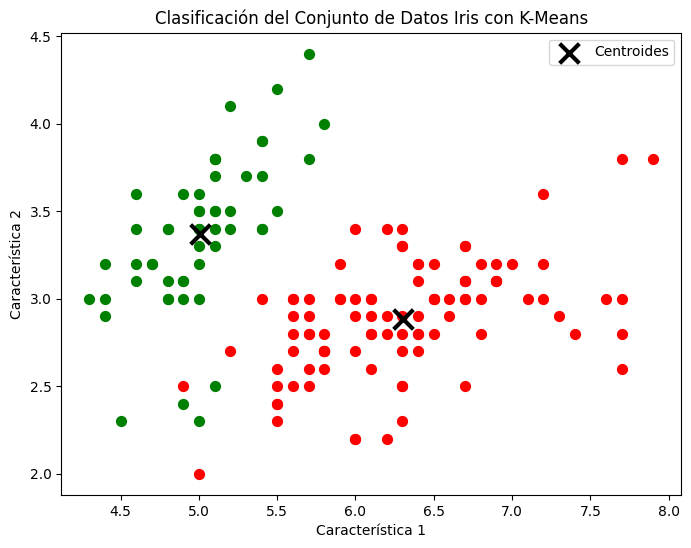

In [39]:
# Asignar cada punto de datos a un cluster
cluster_labels = kmeans.predict(X)

# Extraer los centroides de los clusters
centroids = kmeans.cluster_centers_

# Crear un gráfico de dispersión para visualizar la clasificación
plt.figure(figsize=(8, 6))

# Colores para representar los clusters
colors = ['red', 'green', 'blue']

# Asignar un color a cada punto de datos según su cluster
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], c=colors[cluster_labels[i]], s=50)

# Marcar los centroides de los clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black', label='Centroides')

# Etiquetar los ejes
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Mostrar el gráfico
plt.legend()
plt.title('Clasificación del Conjunto de Datos Iris con K-Means')
plt.show()